In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns
pd.set_option("display.max_columns", 50)

import warnings
warnings.filterwarnings("ignore")

C:\Users\USER\AppData\Local\Temp\ipykernel_6576\3625848236.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Reading in the dataset

In [3]:
# https://www.kaggle.com/datasets/parisrohan/credit-score-classification
train = pd.read_csv(r'.\Data\train.csv')
test = pd.read_csv(r'.\Data\test.csv')

In [4]:
train.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3           4   
1              3           4   
2              3           4   
3              3           4   
4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

  Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                      7                11.27                   4.0   
1                    NaN                11.27                   4.0   
2                      7                    _                   4.0   
3                      4                 6.27                   4.0   
4                    NaN                11.27                   4.0   

  Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0          _           809.98                 26.822620   
1       Good           809.98                 31.944960   
2       Good           809.98                 28.609352   
3       Good           809.98                 31.377862   
4       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

#### Data Preparation and Exploration

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [7]:
train.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
count           84998.000000      100000.000000     100000.00000   
mean             4194.170850          17.091280         22.47443   
std              3183.686167         117.404834        129.05741   
min               303.645417          -1.000000          0.00000   
25%              1625.568229           3.000000          4.00000   
50%              3093.745000           6.000000          5.00000   
75%              5957.448333           7.000000          7.00000   
max             15204.633333        1798.000000       1499.00000   

       Interest_Rate  Delay_from_due_date  Num_Credit_Inquiries  \
count  100000.000000        100000.000000          98035.000000   
mean       72.466040            21.068780             27.754251   
std       466.422621            14.860104            193.177339   
min         1.000000            -5.000000              0.000000   
25%         8.000000            10.000000              3.000000   
50%        13.000000            18.000000              6.000000   
75%        20.000000            28.000000              9.000000   
max      5797.000000            67.000000           2597.000000   

       Credit_Utilization_Ratio  Total_EMI_per_month  
count             100000.000000        100000.000000  
mean                  32.285173          1403.118217  
std                    5.116875          8306.041270  
min                   20.000000             0.000000  
25%                   28.052567            30.306660  
50%                   32.305784            69.249473  
75%                   36.496663           161.224249  
max                   50.000000         82331.000000

In [8]:
train.describe(include = "O")

ID Customer_ID    Month    Name     Age        SSN Occupation  \
count   100000      100000   100000   90015  100000     100000     100000   
unique  100000       12500        8   10139    1788      12501         16   
top     0x1602   CUS_0xd40  January  Langep      38  #F%$D@*&8    _______   
freq         1           8    12500      44    2833       5572       7062   

       Annual_Income Num_of_Loan   Type_of_Loan Num_of_Delayed_Payment  \
count         100000      100000          88592                  92998   
unique         18940         434           6260                    749   
top         36585.12           3  Not Specified                     19   
freq              16       14386           1408                   5327   

       Changed_Credit_Limit Credit_Mix Outstanding_Debt  \
count                100000     100000           100000   
unique                 4384          4            13178   
top                       _   Standard          1360.45   
freq                   2091      36479               24   

            Credit_History_Age Payment_of_Min_Amount Amount_invested_monthly  \
count                    90970                100000                   95521   
unique                     404                     3                   91049   
top     15 Years and 11 Months                   Yes               __10000__   
freq                       446                 52326                    4305   

                     Payment_Behaviour                   Monthly_Balance  \
count                           100000                             98800   
unique                               7                             98792   
top     Low_spent_Small_value_payments  __-333333333333333333333333333__   
freq                             25513                                 9   

       Credit_Score  
count        100000  
unique            3  
top        Standard  
freq          53174

In [9]:
# Converting column names to lower case
train.columns = train.columns.str.lower()
test.columns = test.columns.str.lower()

In [10]:
var_df = pd.DataFrame(columns = ['Columns','NaN','NaN%','unique','nunique','data_type'])

for i, val in enumerate(train.columns):
    var_df.loc[i] = [val, train[val].isna().sum(), str(round((train[val].isna().sum()/ train.shape[0])*100,2)) + '%', train[val].unique(), train[val].nunique(),train[val].dtype]
var_df

Columns    NaN    NaN%  \
0                         id      0    0.0%   
1                customer_id      0    0.0%   
2                      month      0    0.0%   
3                       name   9985   9.98%   
4                        age      0    0.0%   
5                        ssn      0    0.0%   
6                 occupation      0    0.0%   
7              annual_income      0    0.0%   
8      monthly_inhand_salary  15002   15.0%   
9          num_bank_accounts      0    0.0%   
10           num_credit_card      0    0.0%   
11             interest_rate      0    0.0%   
12               num_of_loan      0    0.0%   
13              type_of_loan  11408  11.41%   
14       delay_from_due_date      0    0.0%   
15    num_of_delayed_payment   7002    7.0%   
16      changed_credit_limit      0    0.0%   
17      num_credit_inquiries   1965   1.96%   
18                credit_mix      0    0.0%   
19          outstanding_debt      0    0.0%   
20  credit_utilization_ratio      0    0.0%   
21        credit_history_age   9030   9.03%   
22     payment_of_min_amount      0    0.0%   
23       total_emi_per_month      0    0.0%   
24   amount_invested_monthly   4479   4.48%   
25         payment_behaviour      0    0.0%   
26           monthly_balance   1200    1.2%   
27              credit_score      0    0.0%   

                                               unique  nunique data_type  
0   [0x1602, 0x1603, 0x1604, 0x1605, 0x1606, 0x160...   100000    object  
1   [CUS_0xd40, CUS_0x21b1, CUS_0x2dbc, CUS_0xb891...    12500    object  
2   [January, February, March, April, May, June, J...        8    object  
3   [Aaron Maashoh, nan, Rick Rothackerj, Langep, ...    10139    object  
4   [23, -500, 28_, 28, 34, 54, 55, 21, 31, 33, 34...     1788    object  
5   [821-00-0265, #F%$D@*&8, 004-07-5839, 486-85-3...    12501    object  
6   [Scientist, _______, Teacher, Engineer, Entrep...       16    object  
7   [19114.12, 34847.84, 34847.84_, 143162.64, 306...    18940    object  
8   [1824.8433333333328, nan, 3037.986666666666, 1...    13235   float64  
9   [3, 2, 1, 7, 4, 0, 8, 5, 6, 9, 10, 1414, 1231,...      943     int64  
10  [4, 1385, 5, 1288, 1, 7, 6, 1029, 488, 8, 1381...     1179     int64  
11  [3, 6, 8, 4, 5, 5318, 15, 7, 12, 20, 1, 433, 1...     1750     int64  
12  [4, 1, 3, 967, -100, 0, 0_, 2, 3_, 2_, 7, 5, 5...      434    object  
13  [Auto Loan, Credit-Builder Loan, Personal Loan...     6260    object  
14  [3, -1, 5, 6, 8, 7, 13, 10, 0, 4, 9, 1, 12, 11...       73     int64  
15  [7, nan, 4, 8_, 6, 1, -1, 3_, 0, 8, 5, 3, 9, 1...      749    object  
16  [11.27, _, 6.27, 9.27, 5.42, 7.42, 6.42, 7.1, ...     4384    object  
17  [4.0, 2.0, 3.0, nan, 5.0, 9.0, 8.0, 7.0, 6.0, ...     1223   float64  
18                           [_, Good, Standard, Bad]        4    object  
19  [809.98, 605.03, 1303.01, 632.46, 943.86, 548....    13178    object  
20  [26.822619623699016, 31.94496005538421, 28.609...   100000   float64  
21  [22 Years and 1 Months, nan, 22 Years and 3 Mo...      404    object  
22                                      [No, NM, Yes]        3    object  
23  [49.57494921489417, 18.816214573128885, 246.99...    14950   float64  
24  [80.41529543900253, 118.28022162236736, 81.699...    91049    object  
25  [High_spent_Small_value_payments, Low_spent_La...        7    object  
26  [312.49408867943663, 284.62916249607184, 331.2...    98792    object  
27                             [Good, Standard, Poor]        3    object

Exploring the data we can see that there are missing vlaues in 8 columns. With the highest being `monthly_inhand_salary` which has  `15%` of its values missing. 

The dataset only covers 8 months.

It contains some potentially irrelevant columns which will eventually be dropped before the model building starts.

Also there are lots of erroneous values in this dataset. Subsequently, these errors will be handled.

In [11]:
# Checking for duplicate values

def remove_duplicate(df, holdout_set = None):
    """
    Detect and remove duplicate rows in the dataset.
    """
    b4 = df.shape[0]
    print(f'{holdout_set} -- Before Removing Duplicate: {b4:,}')
    df.drop_duplicates(keep='first', inplace=True)
    after = df.shape[0]
    print (f'{holdout_set} -- After Removing Duplicate: {after:,}', '\n')

    if b4 == after:
        print(f"There are no duplicate rows in the {holdout_set}", '\n')
    else:
        print(f"{b4 - after:,} duplicate row(s) has been removed")


remove_duplicate(train, 'Data') 

Data -- Before Removing Duplicate: 100,000
Data -- After Removing Duplicate: 100,000 

There are no duplicate rows in the Data 



In [12]:
cols = [ 'month', 'age', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score']

relevant_cols = train[cols] 
relevant_copy = relevant_cols.copy()

In [13]:
# create helper functions
def remove_trailing_underscore(col):

    """
    Removes trailing underscores from a specified column in a Pandas DataFrame and converts the cleaned values to numeric.

    Parameters:
    - col (str): The column name for which trailing underscores should be removed.

    Returns:
    - pd.Series: A Pandas Series containing the cleaned and converted numeric values.

    """
    underscore_removed = pd.to_numeric(relevant_copy[col].str.rstrip('_'), errors='coerce')

    return underscore_removed



def categorize_loan_types(type_of_loans_splited):

    """
    Categorizes a list of loan types based on their lengths into 10 different lists.

    Parameters:
    - type_of_loans_splited (list): A list of loan types to be categorized.

    Returns:
    Tuple of 10 lists: (_1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others)
    """

    type_lists = {str(len): [] for len in range(1, 11)}

    for i in type_of_loans_splited:
        length = len(i)
        type_lists[str(length)].append(i)

    _1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others = (
        type_lists[str(len)] for len in range(1, 11)
    )

    return _1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others


def remove_negative_vals(df, col):
    df[col] = abs(df[col])


def convert_to_int(df, cols):
    for col in cols:
        df[col] = df[col].astype('int')


def remove_error_vals(col):

    """
    Removes specified error values from a column in a Pandas DataFrame.

    Parameters:
    - col (str): The column name from which error values should be removed.

    Returns:
    list: A list containing cleaned values with specified error values replaced by NaN.

    """
    error_vals = ['_______','!@9#%8','_']
    cleaned_data = [np.nan if val in error_vals else val for val in relevant_copy[col]]
    return cleaned_data

# def convert_to_numeric(col):
#     cleaned_col = pd.to_numeric(relevant_cols[col], errors='coerce')
#     return cleaned_col



In [14]:
relevant_copy['age'] = remove_trailing_underscore('age')
relevant_copy['annual_income'] = remove_trailing_underscore('annual_income')
relevant_copy['num_of_loan'] = remove_trailing_underscore('num_of_loan')
relevant_copy['num_of_delayed_payment'] = remove_trailing_underscore('num_of_delayed_payment')
relevant_copy['changed_credit_limit'] = remove_trailing_underscore('changed_credit_limit')
relevant_copy['outstanding_debt'] = remove_trailing_underscore('outstanding_debt')
relevant_copy['amount_invested_monthly'] = remove_trailing_underscore('amount_invested_monthly')
relevant_copy['monthly_balance'] = remove_trailing_underscore('monthly_balance')


In [15]:
num_col = relevant_copy.select_dtypes(include=np.number).columns
cat_col = relevant_copy.select_dtypes(include="object").columns

print(num_col)
print("")
print(cat_col)

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

Index(['month', 'occupation', 'type_of_loan', 'credit_mix',
       'credit_history_age', 'payment_of_min_amount', 'payment_behaviour',
       'credit_score'],
      dtype='object')


In [16]:
for i in cat_col:
    distinct_vals = relevant_copy[i].nunique()
    print(f'{distinct_vals} unique values in {i} column:')
    print(relevant_copy[i].unique())
    print("")
    print("__________" * 8)


8 unique values in month column:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

________________________________________________________________________________
16 unique values in occupation column:
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

________________________________________________________________________________
6260 unique values in type_of_loan column:
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

________________________________________________________________________________
4 unique values in credit_mix column:
['_' 'Good

The for loop above shows the unique values in the categorical columns. The idea is to see some erroneous values. And from this, we can see a few errors like `_______`, `_` and `'!@9#%8'`.

In [17]:
# Applying the remove_error_vals function to all categorical coolumns
for i in cat_col:
    relevant_copy[i] = remove_error_vals(i)
    

In [18]:
for i in cat_col:
    distinct_vals = relevant_copy[i].nunique()
    print(f'{distinct_vals} unique values in {i} column:')
    print(relevant_copy[i].unique())
    print("")
    print("__________" * 8)


8 unique values in month column:
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']

________________________________________________________________________________
15 unique values in occupation column:
['Scientist' nan 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']

________________________________________________________________________________
6260 unique values in type_of_loan column:
['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']

________________________________________________________________________________
3 unique values in credit_mix column:
[nan 'Good' 'Sta

#### Distribution of the credit scores

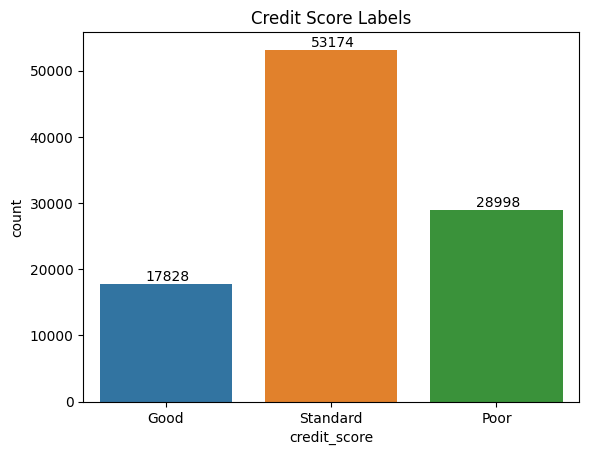

In [19]:
ax = sns.countplot(relevant_copy, x='credit_score',hue='credit_score')

for p in ax.patches:
    x = p.get_x() + p.get_width()/2
    y = int(p.get_height())
    ax.annotate(text = y, xy = (x,y), ha = 'center', va = 'center', xytext = (1,5), textcoords = 'offset points')

plt.title('Credit Score Labels');
    


There are 3 credit classes in this dataset `Good,Standard and Poor`. The `Standard` class is the most represented class in the dataset with `53,174`. While `28,998` rows represent the `Poor` class. And `17,828` for the `Good` class. The difference between these classes already shows the dataset is imbalanced. Later on in this lab, this imbalance will be handled using some techniques.

#### Month and credit score distribution

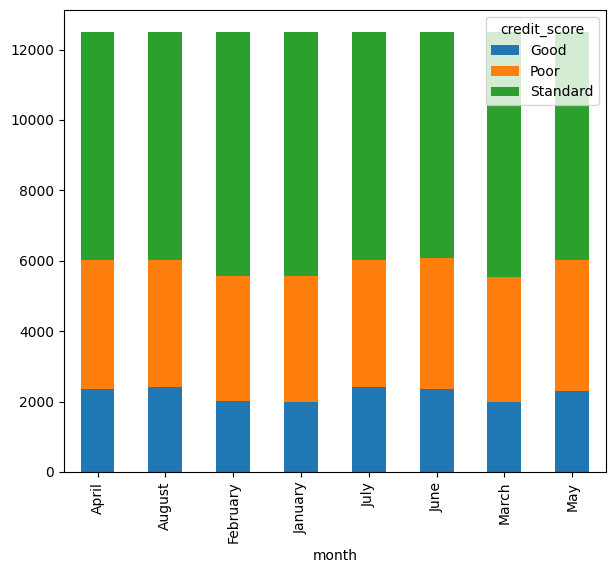

In [46]:
columns_cross = pd.crosstab(relevant_copy['month'],relevant_copy['credit_score'])
# plt.figure(figsize=(20, 10))

columns_cross.plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(7, 6)

plt.title('Month and credit scpre')

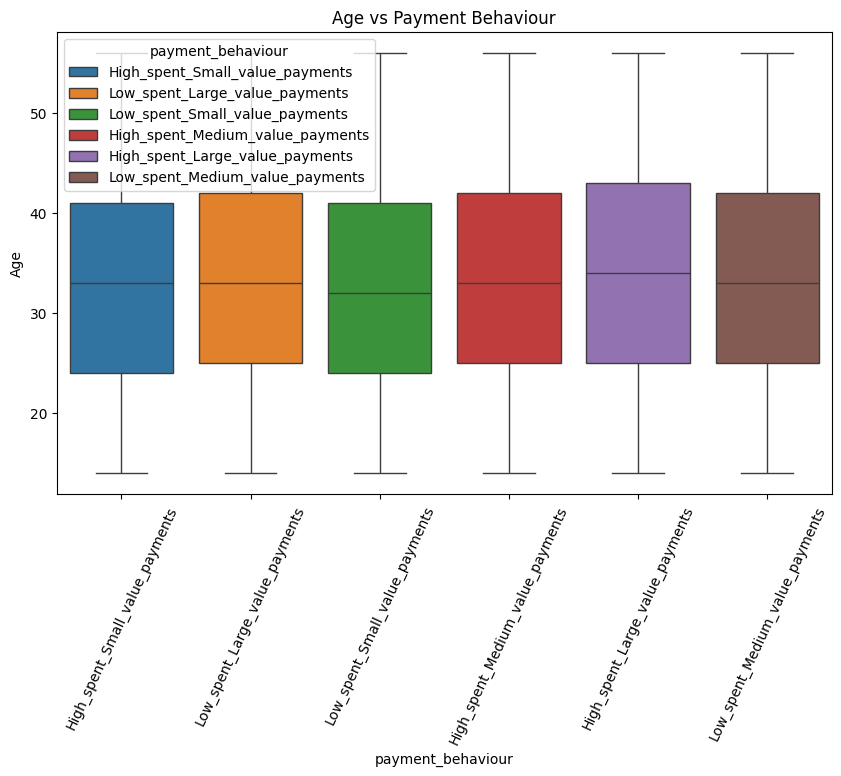

In [71]:
# relevant_copy[['age', 'payment_behaviour']]

plt.figure(figsize=(10, 6))
df = relevant_copy[(relevant_copy['age'] > 0) & (relevant_copy['age'] < 80)]
age_bins = [20, 30, 40, 50, 60, 70, 80]
df['age_group'] = pd.cut(df['age'], bins=age_bins)
# sns.boxplot(x='payment_behaviour', y='age', data=df, hue='payment_behaviour')
sns.boxplot(x='payment_behaviour', y='age', hue='payment_behaviour', data=df)

plt.title('Age vs Payment Behaviour')
plt.xlabel('payment_behaviour')
plt.ylabel('Age')
plt.xticks(rotation = 65)
plt.show()

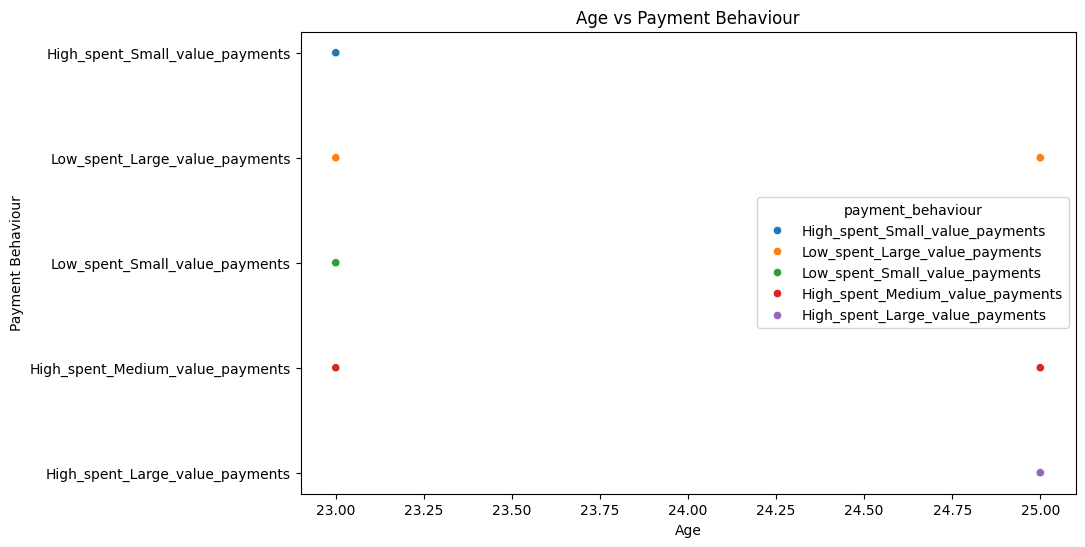

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# You may need to replace 'payment_behaviour' with the actual column name containing payment behaviors
# Age is on the x-axis, payment behavior on the y-axis

# Sample Data
data = {'age': [23, 23, -500, 23, 23, 25, 25, 25, 25],
        'payment_behaviour': ['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments',
                               'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments',
                               'High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'Low_spent_Large_value_payments']}

df = pd.DataFrame(data)

# Remove outliers (negative age in this case)
df = df[df['age'] > 0]

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='payment_behaviour', data=df, hue='payment_behaviour')
plt.title('Age vs Payment Behaviour')
plt.xlabel('Age')
plt.ylabel('Payment Behaviour')
plt.show()


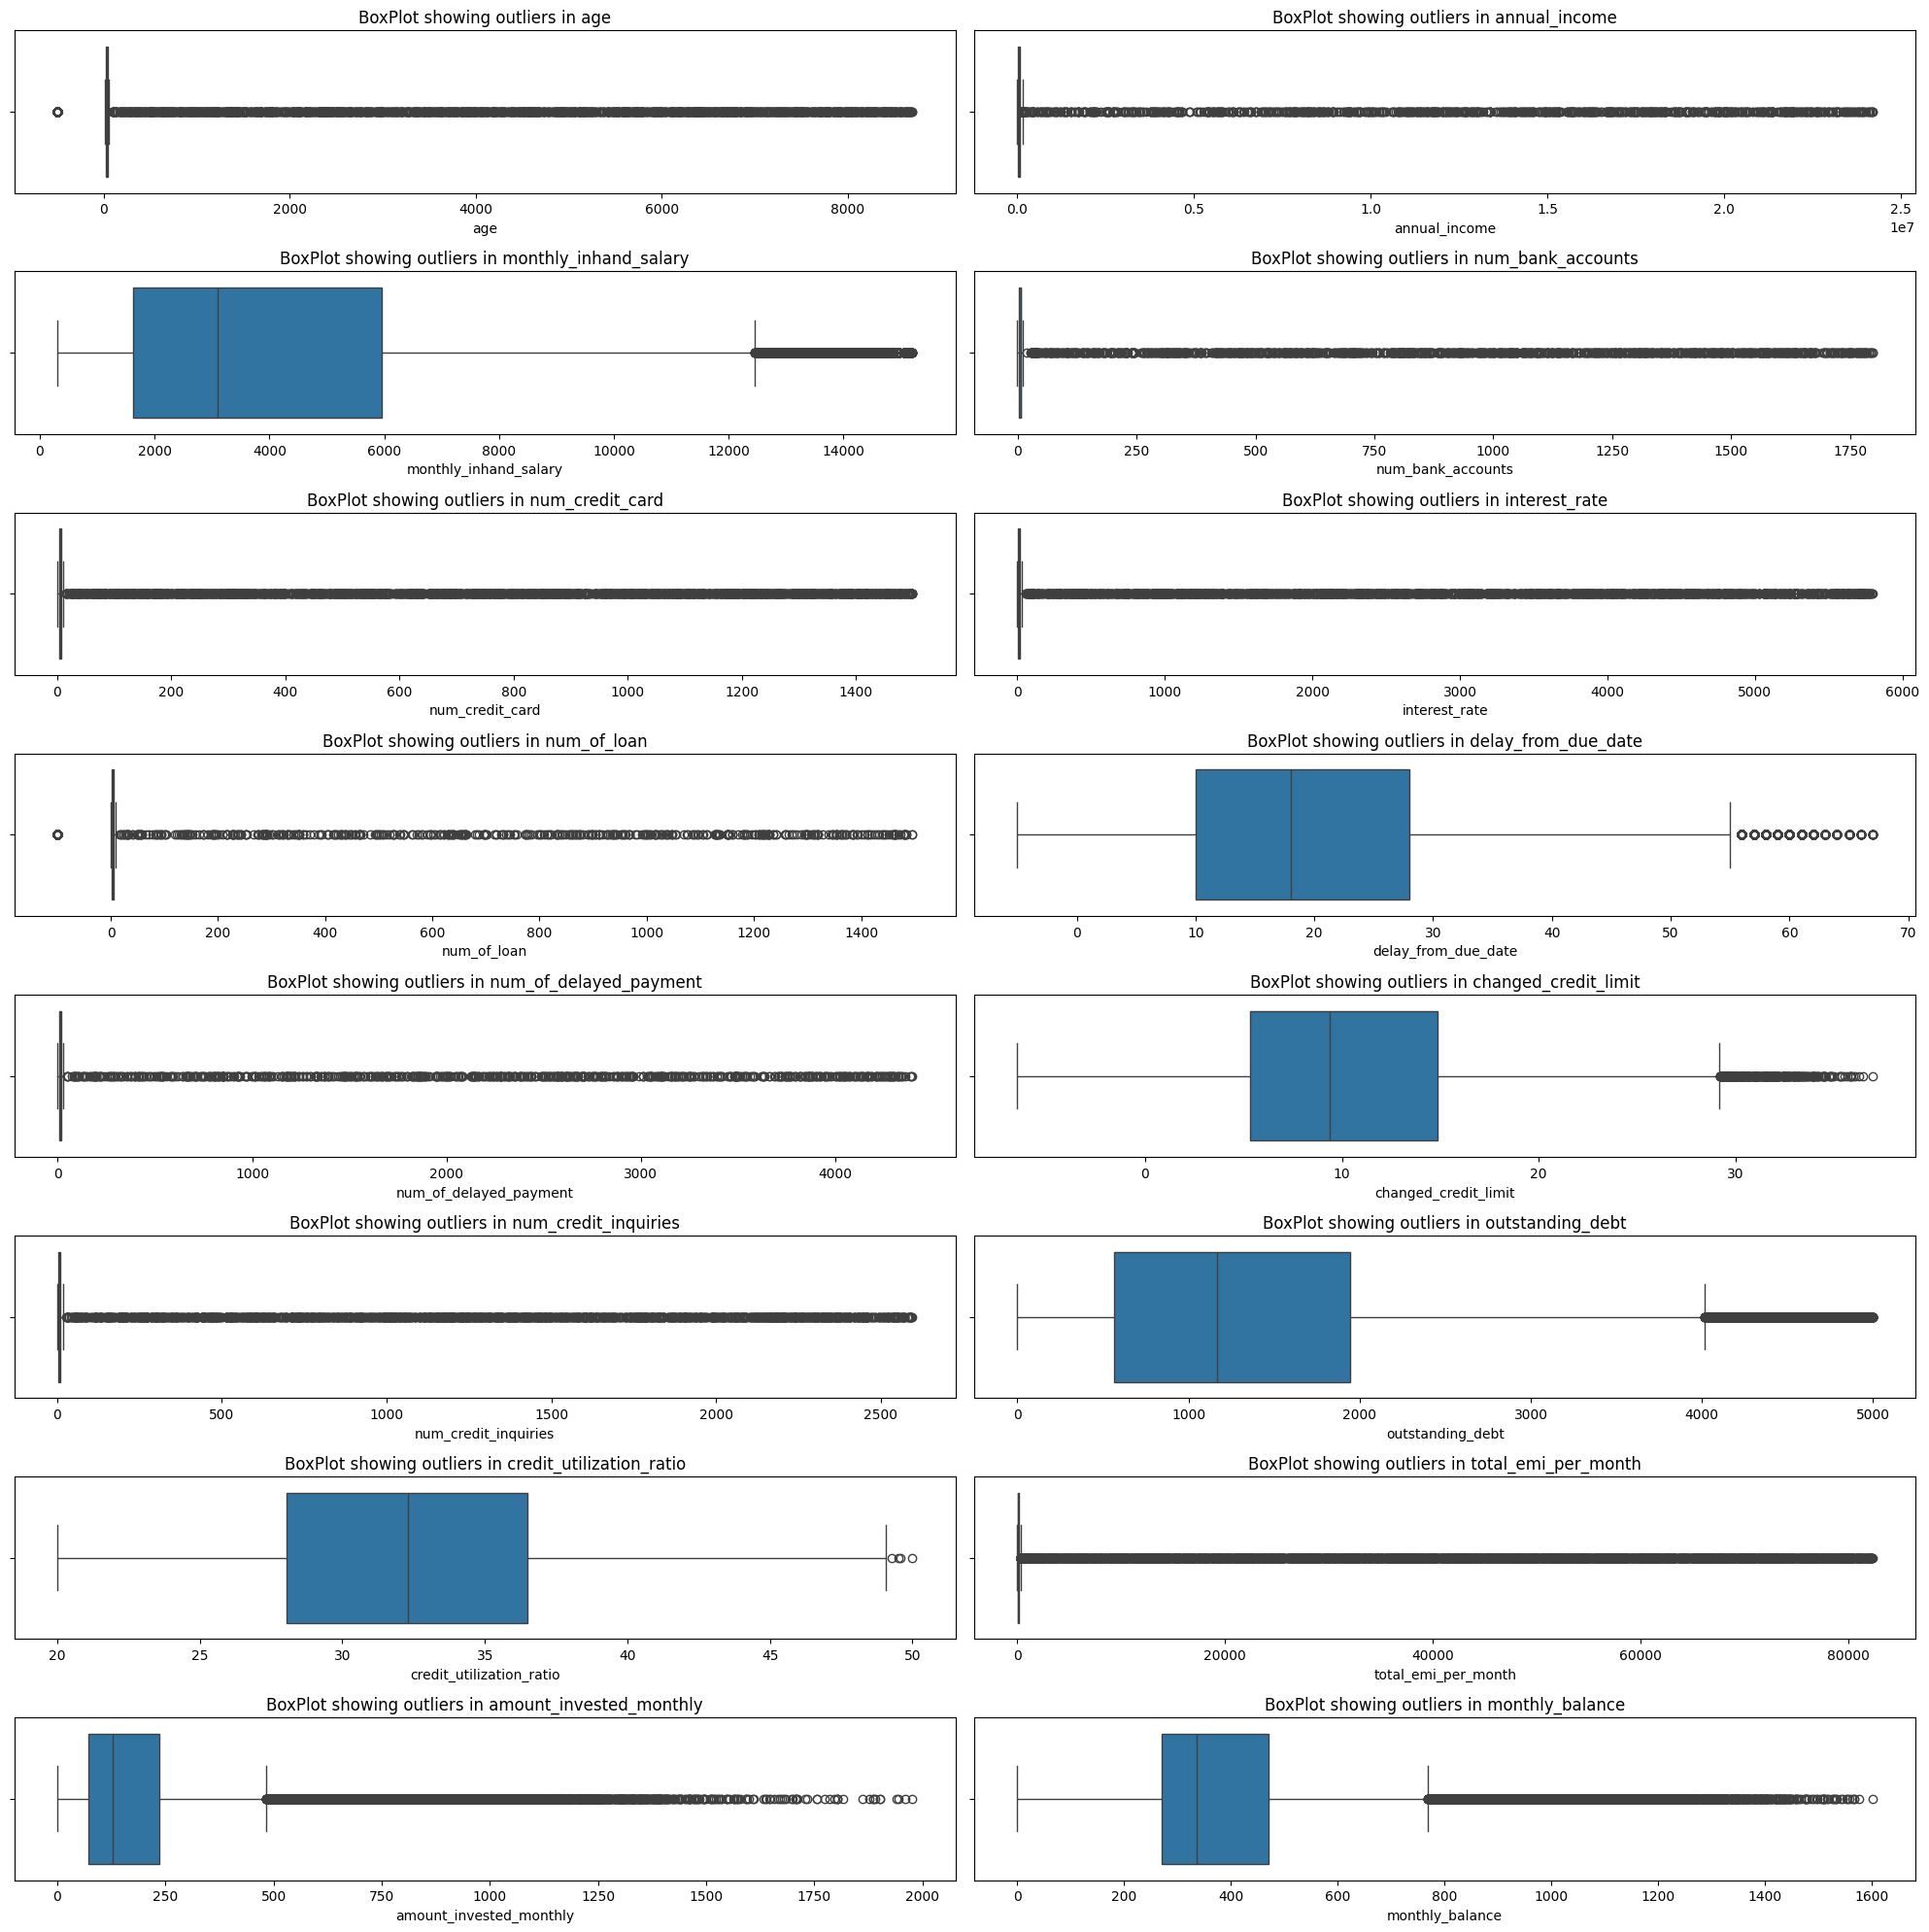

In [19]:
fig, axes = plt.subplots(8, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'BoxPlot showing outliers in {col}')

plt.tight_layout()
plt.show()

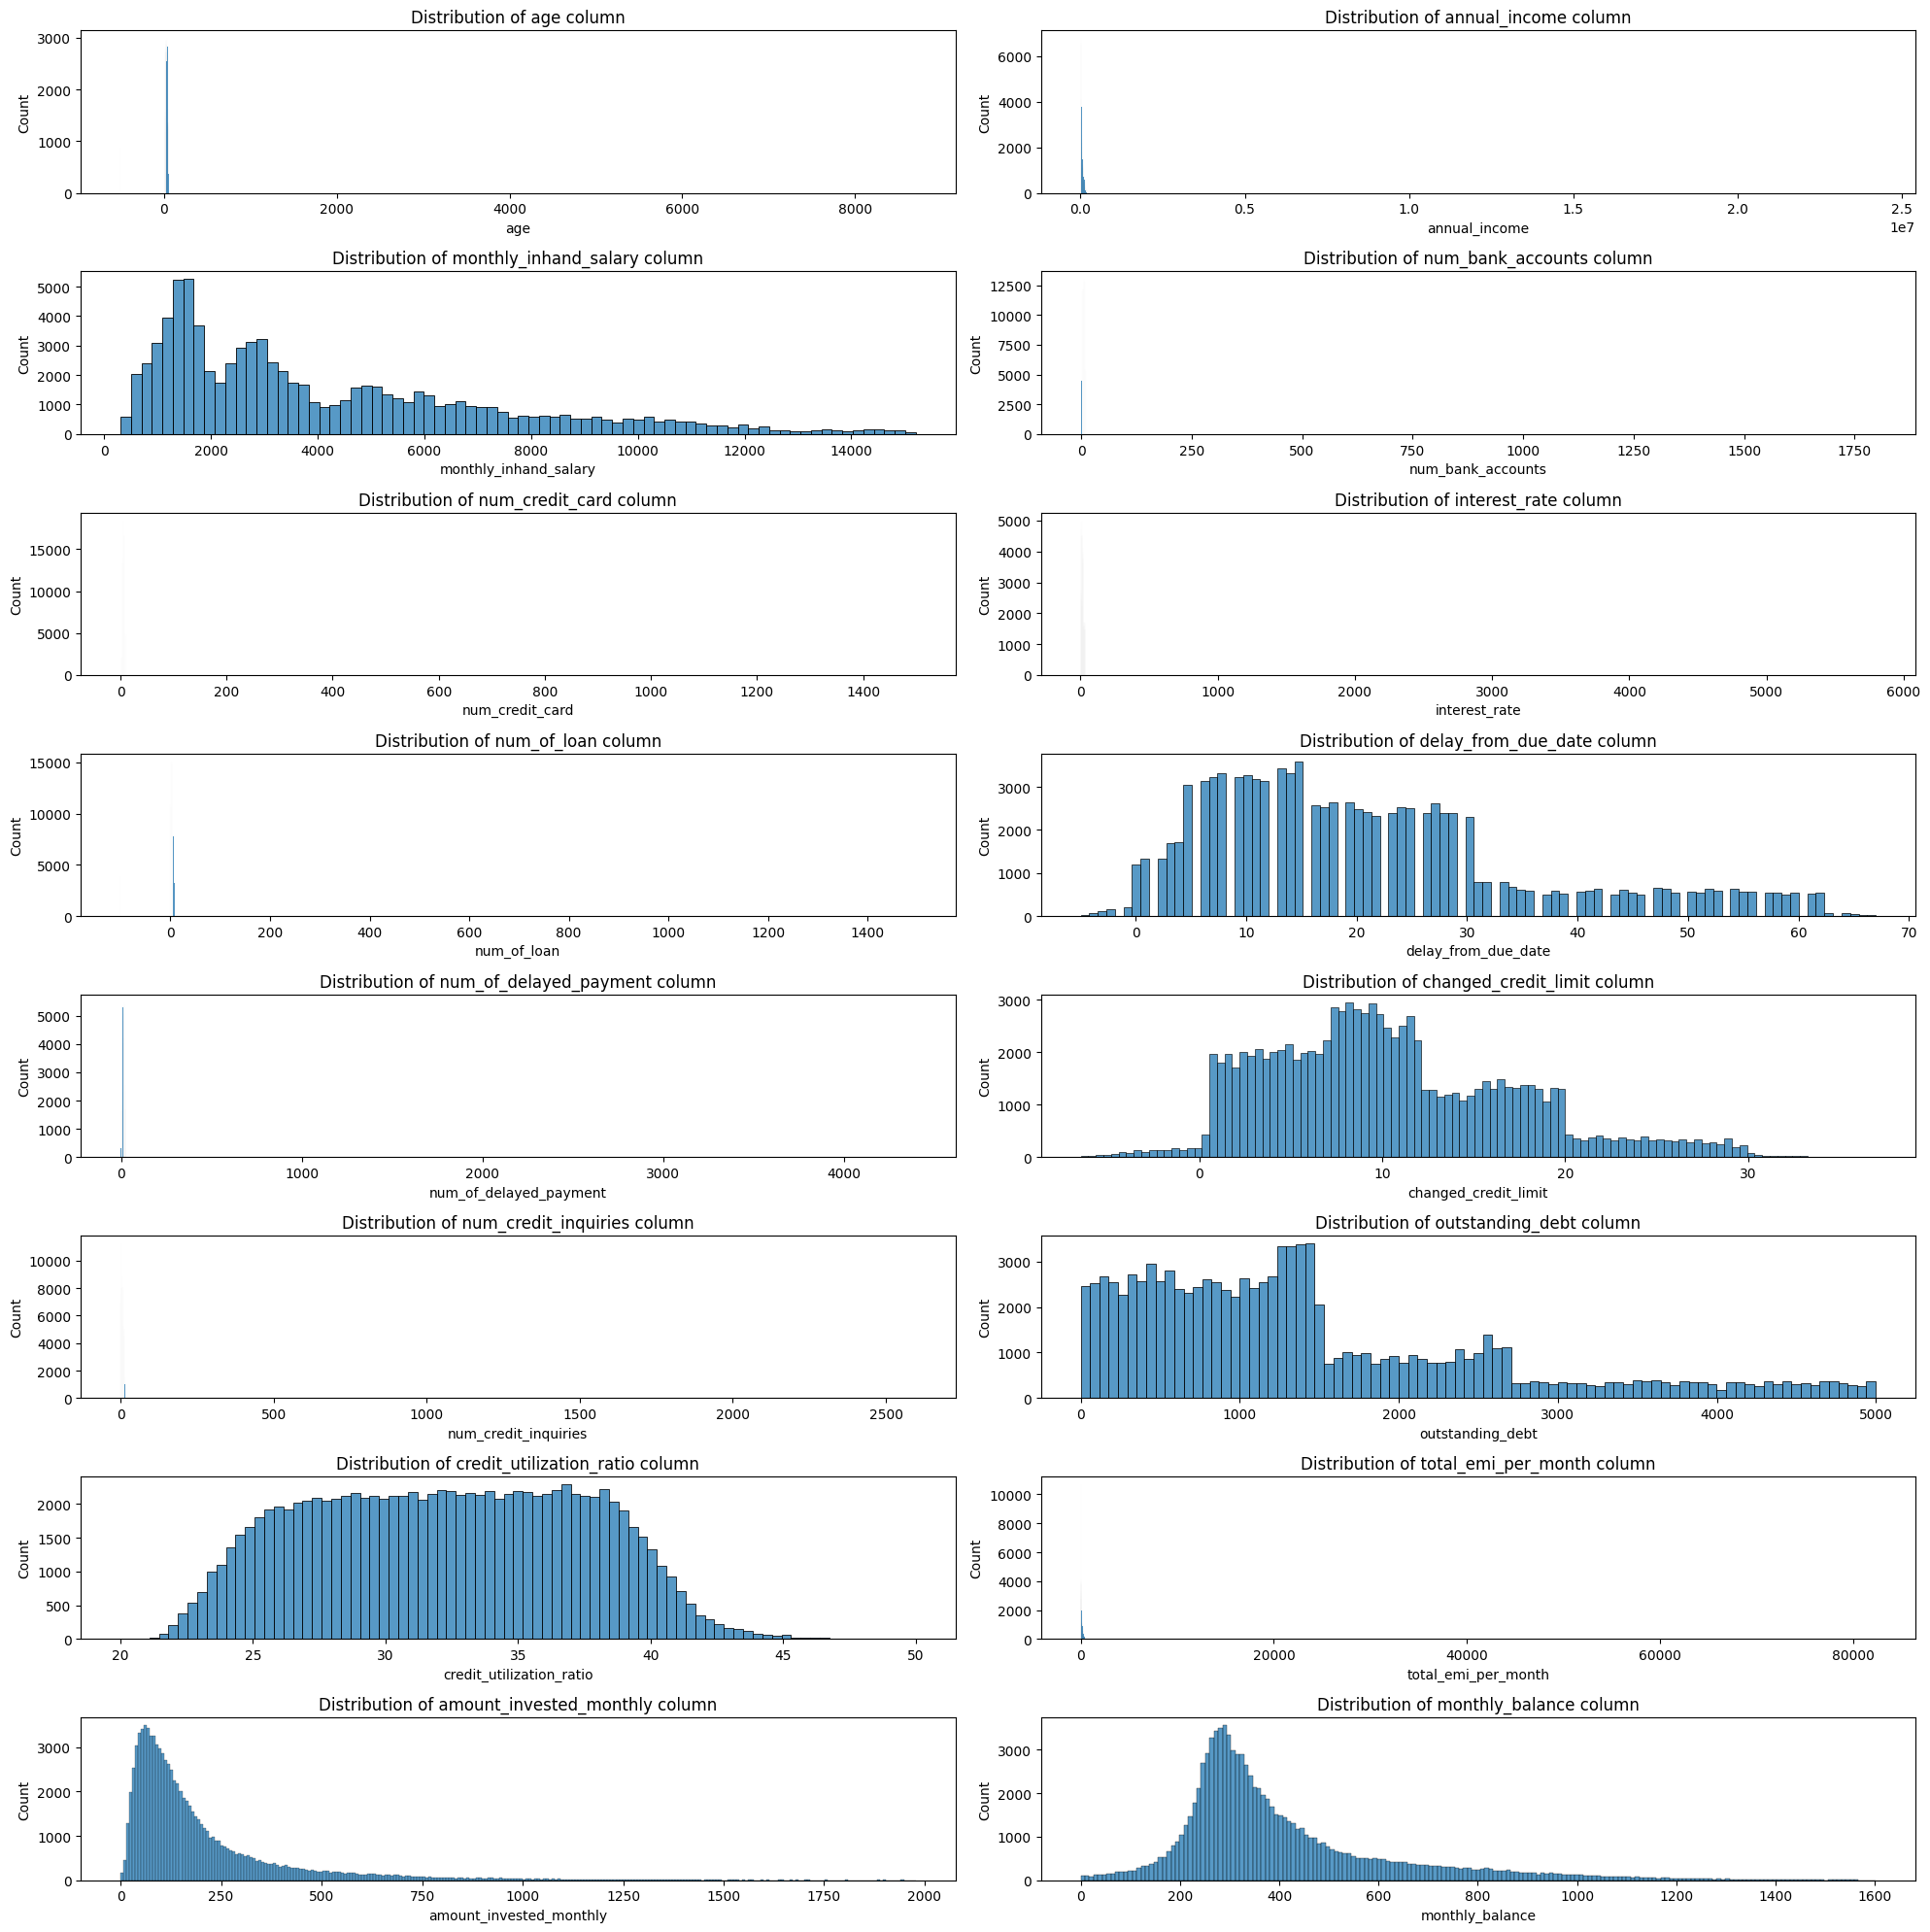

In [20]:
fig, axes = plt.subplots(8, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.histplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'Distribution of {col} column')

plt.tight_layout()
plt.show()

The descriptive statistics and the vardf already gave an idea of what the data missing values are. Now boxplot and hisplot have been used to visualize the numerical columns in the dataset. The boxplot shows that there are outliers in all the numerical columns. Some have too many outliers on one side and the histplot further validates the convergence of data on the left side. This is what we call `right skew distribution`. The `credit_utilization_ratio` appears to be the only numerical column with a symmetric distribution. These outliers will be handled using winsorization where values above the 75th percentile will be replaced with the 75th percentile value and values below the 25th will be replaced with the 25th percentile.

### Data Cleaning

In [21]:
# outliers_df = pd.DataFrame()

for feature in num_col:
    # if feature == 'age':
    Q1 = relevant_copy[feature].quantile(0.25)
    Q3 = relevant_copy[feature].quantile(0.75)
    # print('Q1:',Q1, 'Q3:', Q3)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the upper/lower bound
    relevant_copy[feature] = relevant_copy[feature].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

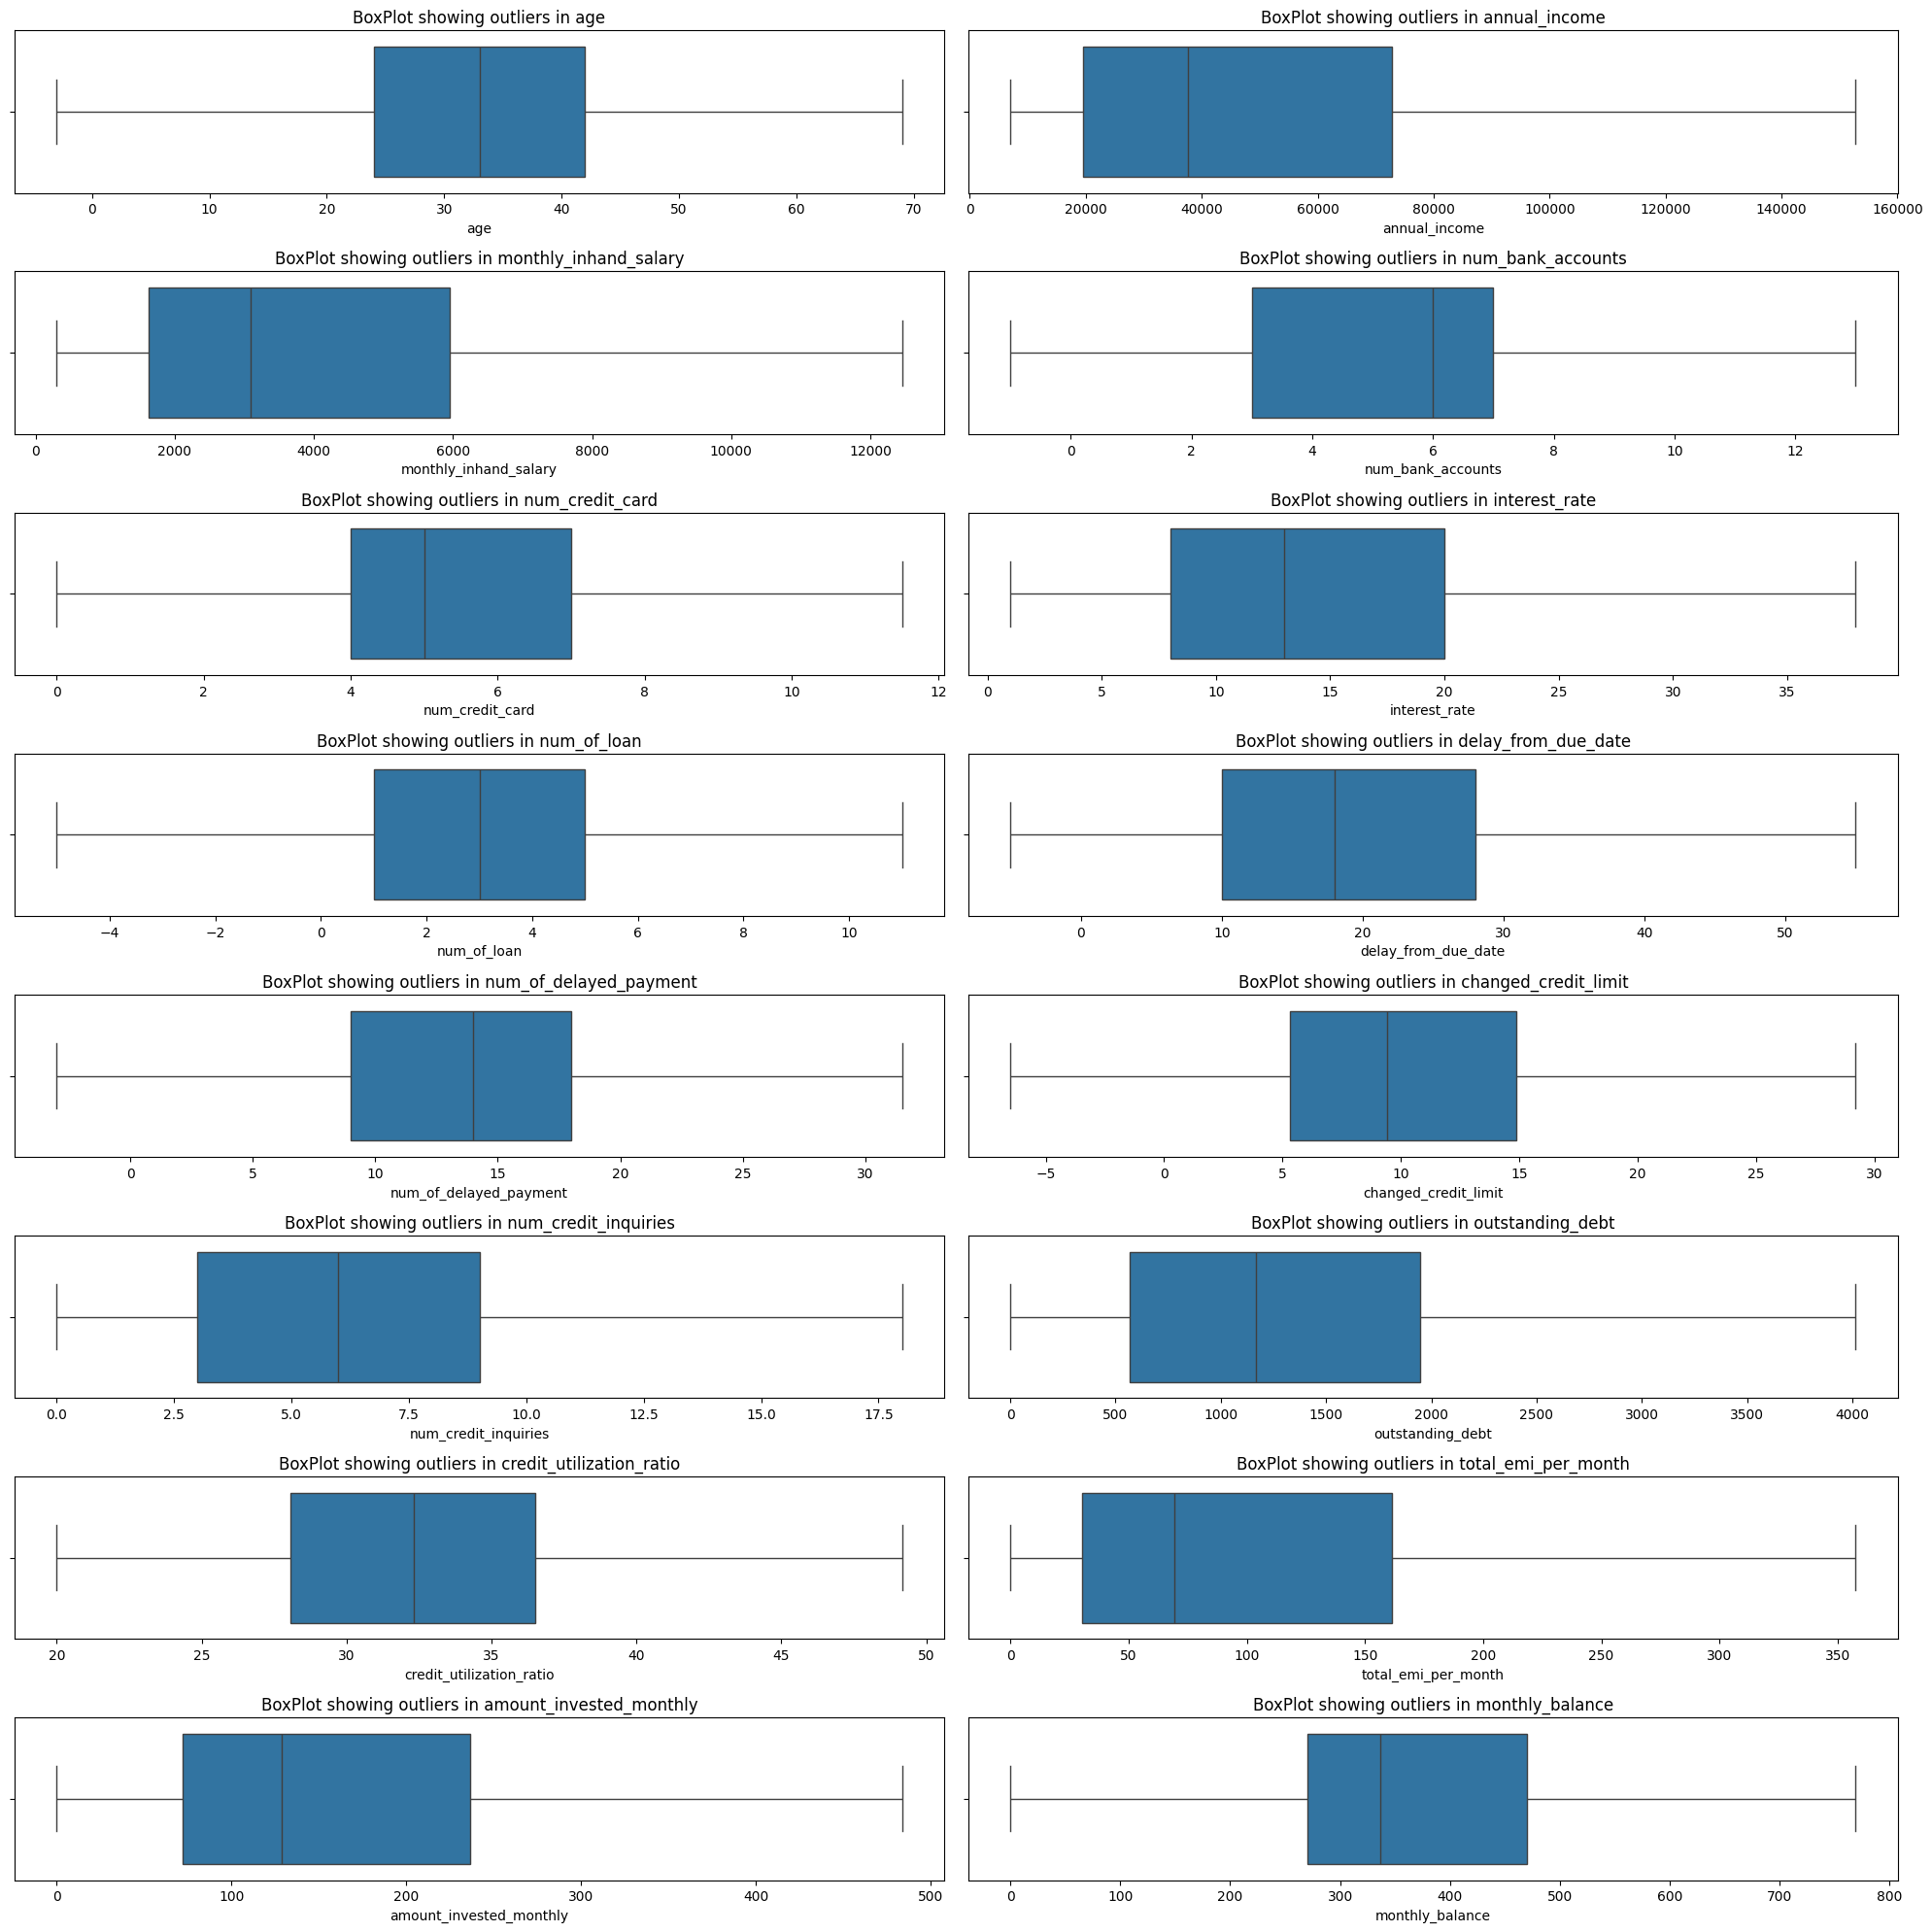

In [22]:
fig, axes = plt.subplots(8, 2, figsize = (20, 20))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(x = relevant_copy[col], ax = axes[i])
    axes[i].set_title(f'BoxPlot showing outliers in {col}')

plt.tight_layout()
plt.show()

#### Handling Missing Vlaues

In the cells above, it was observed that outliers were present in this dataset. And to handle them, they were replaced with the upper and lower bounds. Considering the fact that these outliers wether handled or not will somewhat affect the mean of the numerical values, it would be best to replace the missin values with the `median`. While missing values in the categorical values will be replace the `mode`.    

In [23]:
# Numerical cols
for i, val in enumerate(num_col):
    median_val = relevant_copy[val].median()
    relevant_copy[val].fillna(median_val,inplace=True)


# Categorical cols
for val in cat_col:
    mode_val = relevant_copy[val].mode()
    
    # Check if mode_val is not empty and not NaN
    if not mode_val.empty and not pd.isna(mode_val.iloc[0]):
        relevant_copy[val].fillna(mode_val.iloc[0], inplace=True)
    else:
        # If mode is NaN or empty, fill with a default value
        relevant_copy[val].fillna('Missing_value', inplace=True)


# relevant_copy.info()

Further exploration of the dataset revealed that some columns still have some values that needs some touch. Looking at the age column, there are values which are still in negative while some are below 18. Since this dataset is about predicting credit scores, it makes no sense to have people who are less than 18 in this data. Comparing their age to their `credit_history_age` confirms that these values are erroneuos.

The `credit_history_age` column has about `404` unique values, this is because the history is recorded in months and years. To make this easier to process, this column will be converted to months and then grouped.

Also, there are some negative values in some numerical columns like `age, num_bank_accounts, interest_rate, num_of_loan, delay_from_due_date, num_of_delayed_payment`, changed_credit_limit. These negative values are likely due to errors. To handle these, it would be assumed that the negative is just an error. These values will be replaced with their absolute values. 

In [24]:
affected_cols = 'age', 'num_bank_accounts', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment'
for col in affected_cols:
    remove_negative_vals(relevant_copy,col)


In [25]:
above_18 = relevant_copy[relevant_copy['age']>=18]

above_18['history_in_yrs'] = above_18['credit_history_age'].str.split(' ').str[0].astype('int')
above_18['diff_btwn_age_and_hist'] = above_18['age'] - above_18['history_in_yrs'].astype('int')
above_18['months'] = above_18['credit_history_age'].apply(lambda x: int(x.split(' ')[-2]))
above_18['credit_history_age'] = (above_18['history_in_yrs'] * 12) + above_18['months']

 
for index,val in enumerate(above_18.diff_btwn_age_and_hist):
    if val < 18:
        above_18['age'].iloc[index] = above_18['age'].iloc[index] + 18


above_18['new_diff'] = above_18['age'] - above_18['history_in_yrs'].astype('int')
age_cleaned = above_18[above_18['new_diff']>18]

In [26]:
cols_to_drop = ['history_in_yrs','diff_btwn_age_and_hist','new_diff', 'months']
age_cleaned.drop(cols_to_drop, axis = 1, inplace =True)

In [27]:
cols_to_convert = ['age','num_bank_accounts','num_credit_card','interest_rate','num_credit_inquiries',
                   'num_of_loan','delay_from_due_date','num_of_delayed_payment']

convert_to_int(age_cleaned, cols_to_convert)


In [28]:
type_of_loans_splited = age_cleaned.type_of_loan.str.split(', ')

_1_types, _2_types, _3_types, _4_types, _5_types, _6_types, _7_types, _8_types, _9_types, _others = categorize_loan_types(type_of_loans_splited)



print(f'1 loan: {_1_types}')
print('____________'*10)
print(f'2 loans: {_2_types}')
print('____________'*10)
print(f'3 loans: {_3_types}')
print('____________'*10)
print(f'4 loans: {_4_types}')
print('____________'*10)
print(f'5 loans: {_5_types}')
print('____________'*10)
print(f'6 loans: {_6_types}')
print('____________'*10)
print(f'7 loans: {_7_types}')
print('____________'*10)
print(f'8 loans: {_8_types}')
print('____________'*10)
print(f'9 loans: {_9_types}')
print('____________'*10)
print(f'Others: {_others}')
# print('____________'*10)
# iloc[1]



loans_list = [_1_types,_2_types,_3_types,_4_types,_5_types,_6_types,_7_types,_8_types,_9_types]
[i[0] for i in loans_list]

1 loan: [['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Credit-Builder Loan'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Debt Consolidation Loan'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Specified'], ['Not Sp

[['Credit-Builder Loan'],
 ['Credit-Builder Loan', 'and Mortgage Loan'],
 ['Auto Loan', 'Auto Loan', 'and Not Specified'],
 ['Auto Loan', 'Credit-Builder Loan', 'Personal Loan', 'and Home Equity Loan'],
 ['Not Specified',
  'Student Loan',
  'Student Loan',
  'Credit-Builder Loan',
  'and Auto Loan'],
 ['Credit-Builder Loan',
  'Not Specified',
  'Mortgage Loan',
  'Payday Loan',
  'Credit-Builder Loan',
  'and Personal Loan'],
 ['Personal Loan',
  'Payday Loan',
  'Student Loan',
  'Auto Loan',
  'Home Equity Loan',
  'Student Loan',
  'and Payday Loan'],
 ['Payday Loan',
  'Not Specified',
  'Credit-Builder Loan',
  'Debt Consolidation Loan',
  'Payday Loan',
  'Not Specified',
  'Student Loan',
  'and Student Loan'],
 ['Credit-Builder Loan',
  'Personal Loan',
  'Credit-Builder Loan',
  'Mortgage Loan',
  'Personal Loan',
  'Payday Loan',
  'Payday Loan',
  'Payday Loan',
  'and Student Loan']]

In [29]:


# Identify unique values
unique_loan_types = age_cleaned['type_of_loan'].str.split(', ').explode().unique()
# Remove 'and'
unique_loan_types_ = [x.split('and ')[1] if x.startswith('and') else x for x in unique_loan_types] 


# Create binary columns
for loan_type in unique_loan_types_:
    age_cleaned[loan_type] = age_cleaned['type_of_loan'].apply(lambda x: 1 if loan_type in x else 0)

# Drop the original column 
age_cleaned = age_cleaned.drop('type_of_loan', axis=1)

age_cleaned


month  age occupation  annual_income  monthly_inhand_salary  \
0       January   41  Scientist       19114.12            1824.843333   
1      February   41  Scientist       19114.12            3093.745000   
3         April   41  Scientist       19114.12            3093.745000   
4           May   41  Scientist       19114.12            1824.843333   
5          June   41  Scientist       19114.12            3093.745000   
...         ...  ...        ...            ...                    ...   
99987     April   28  Architect       20002.88            1929.906667   
99988       May   28  Architect       20002.88            1929.906667   
99989      June   28     Lawyer       20002.88            1929.906667   
99990      July   46  Architect       20002.88            1929.906667   
99991    August   29  Architect       20002.88            1929.906667   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                      3                4              3            4   
1                      3                4              3            4   
3                      3                4              3            4   
4                      3                4              3            4   
5                      3                4              3            4   
...                  ...              ...            ...          ...   
99987                 10                8             29            5   
99988                 10                8             29            5   
99989                 10                8             29            5   
99990                 10                8             29            5   
99991                 10                8             29            5   

       delay_from_due_date  num_of_delayed_payment  changed_credit_limit  \
0                        3                       7                 11.27   
1                        1                      14                 11.27   
3                        5                       4                  6.27   
4                        6                      14                 11.27   
5                        8                       4                  9.27   
...                    ...                     ...                   ...   
99987                   33                      25                 18.31   
99988                   33                      25                 18.31   
99989                   33                      25                 16.31   
99990                   33                      26                 18.31   
99991                   33                      25                 18.31   

       num_credit_inquiries credit_mix  outstanding_debt  \
0                         4   Standard            809.98   
1                         4       Good            809.98   
3                         4       Good            809.98   
4                         4       Good            809.98   
5                         4       Good            809.98   
...                     ...        ...               ...   
99987                     9   Standard           3571.70   
99988                     9   Standard           3571.70   
99989                     9        Bad           3571.70   
99990                     9        Bad           3571.70   
99991                     9        Bad           3571.70   

       credit_utilization_ratio  credit_history_age payment_of_min_amount  \
0                     26.822620                 265                    No   
1                     31.944960                 191                    No   
3                     31.377862                 268                    No   
4                     24.797347                 269                    No   
5                     27.262259                 270                    No   
...                         ...                 ...                   ...   
99987                 30.614953                  71                   Yes   
99988 

The dataset has been cleaned and some features have be engineered.